## Загрузка и подготовка данных

In [119]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import scipy.stats as st
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 

In [120]:
RANDOM_STATE = 42 
TEST_SIZE = 0.25 

Загрузим данные и проверим, корректно ли они загрузились 

In [121]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv') 

In [122]:
data_0.head() 

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [123]:
data_0.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [124]:
data_1.head() 

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [125]:
data_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [126]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [127]:
data_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Данные заагрузились корректно, теперь проверим их на наличие дубликатов 

In [128]:
data_0.duplicated().sum() 

0

In [129]:
data_1.duplicated().sum() 

0

In [130]:
data_2.duplicated().sum() 

0

Дубликатов нет 

Проведем исследовательский анализ данных, посмотрим, что они представляют из себя

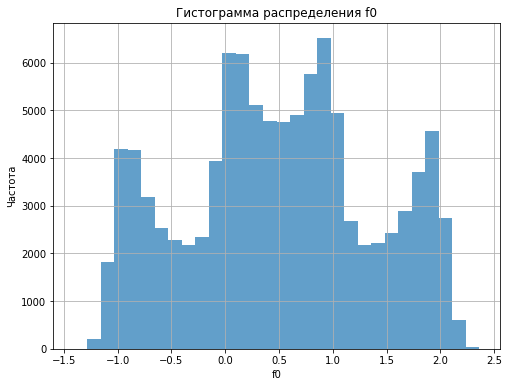

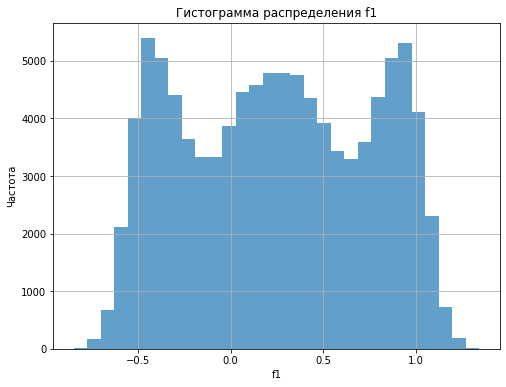

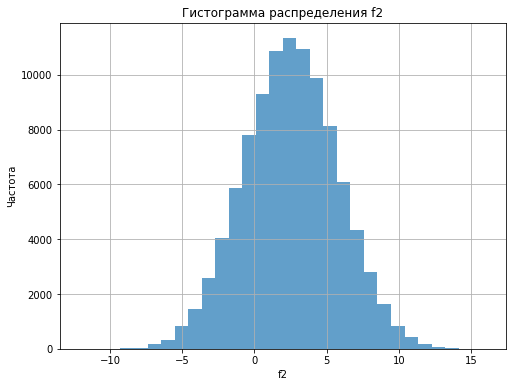

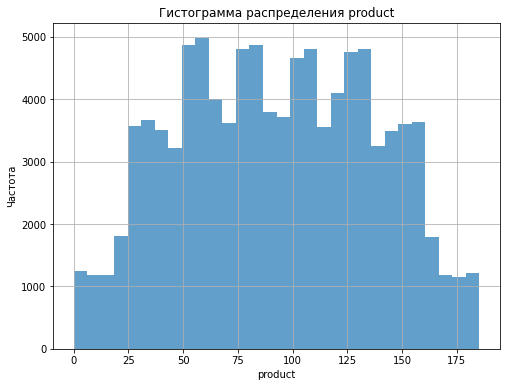

In [131]:
for column in data_0.columns:
    if (data_0[column].dtype != 'object') and (column != 'id'):  
        value_counts = data_0[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(data_0[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

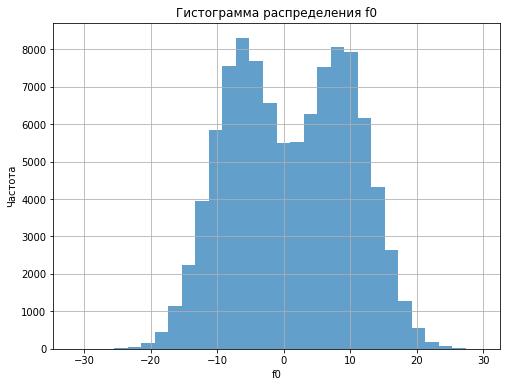

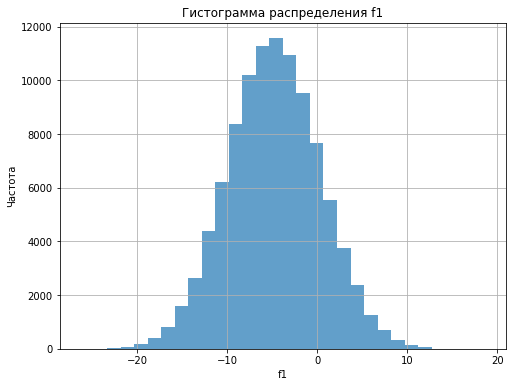

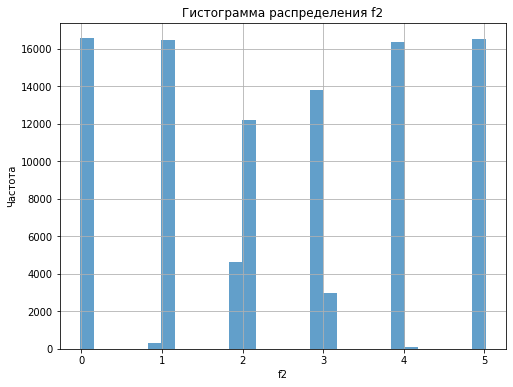

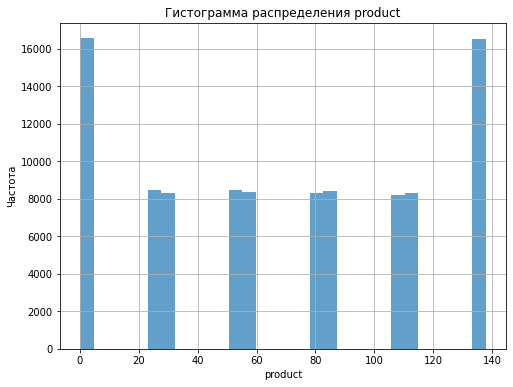

In [132]:
for column in data_1.columns:
    if (data_1[column].dtype != 'object') and (column != 'id'):  
        value_counts = data_1[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(data_1[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

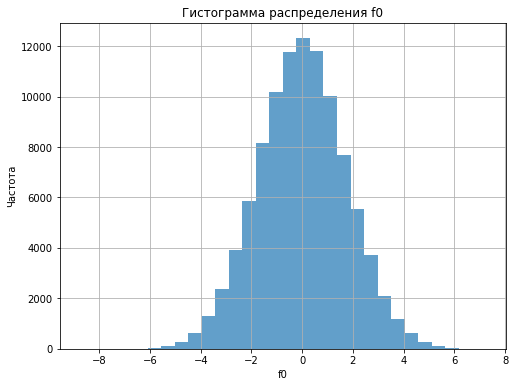

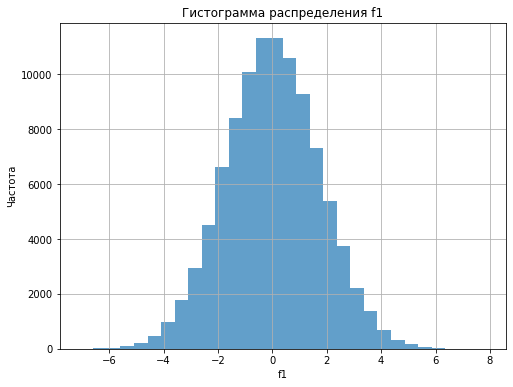

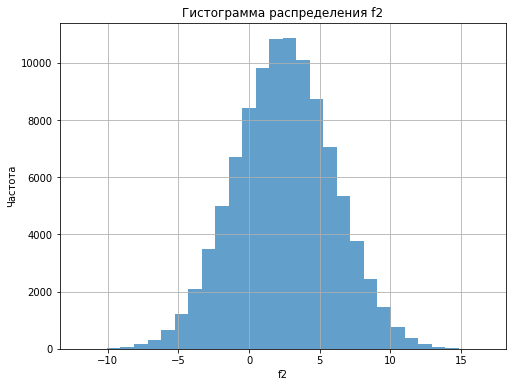

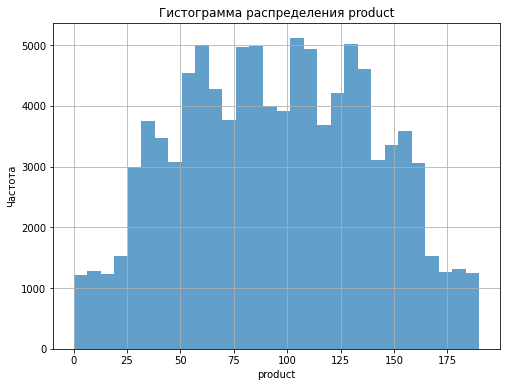

In [133]:
for column in data_2.columns:
    if (data_2[column].dtype != 'object') and (column != 'id'):  
        value_counts = data_2[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(data_2[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

Распределения параметров где-то нормальные, где-то нет, посмотрим корреляцию 

In [134]:
data_0.corr() 

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [135]:
data_1.corr() 

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [136]:
data_2.corr() 

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Очень сильная зависимость у признаков f2 и product во втором регионе - почти 1, в остальных случаяз зависимость крайне мала, либо средняяво втором и третьем регионе зависимость признака product от f0, f1 практически отсутствует 

По итогу первого шага можно сделать такие выводы: 
    - загруженные данные корректны, без дубликатов
    - распределения признаков совершенно разные, встречаются нормальные и не нормальные, также есть аномалии в регионе 2 признаков f2 и product 
    - прослеживается зависимость признака product от f2, особенно во втором регионе, там корреляция почти достигает единицы 

## Обучение и проверка модели

Выделим из датасетов обучающие признаки features и целевой признак target: 

In [137]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [138]:
target_0=data_0['product']
features_0=data_0.drop(['product', 'id'], axis=1)

target_1=data_1['product']
features_1=data_1.drop(['product', 'id'], axis=1)

target_2=data_2['product']
features_2=data_2.drop(['product', 'id'], axis=1)

Разобьём данные на обучающую и валидационную выборки в соотношении 75:25 

In [139]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = \
        train_test_split(features_0, target_0, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [140]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = \
        train_test_split(features_1, target_1, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [141]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = \
        train_test_split(features_2, target_2, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Создадим и обучим модель, будем использовать линейную регрессию, затем сделаем предсказания на валидационной выборке, а так же оценим качество модели 

In [142]:
model_0=LinearRegression()
model_0.fit(features_train_0,target_train_0) 
predict_0=model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predict_0)**0.5
print('Среднеквадратичная ошибка RMSE:', rmse_0.round(2)) 
print('Средний запас предсказанного сырья:', predict_0.mean().round(2)) 

Среднеквадратичная ошибка RMSE: 37.76
Средний запас предсказанного сырья: 92.4


In [143]:
model_1=LinearRegression()
model_1.fit(features_train_1,target_train_1) 
predict_1=model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE:', rmse_1.round(2)) 
print('Средний запас предсказанного сырья:', predict_1.mean().round(2)) 

Среднеквадратичная ошибка RMSE: 0.89
Средний запас предсказанного сырья: 68.71


In [144]:
model_2=LinearRegression()
model_2.fit(features_train_2,target_train_2) 
predict_2=model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE:', rmse_2.round(2)) 
print('Средний запас предсказанного сырья:', predict_2.mean().round(2)) 

Среднеквадратичная ошибка RMSE: 40.15
Средний запас предсказанного сырья: 94.77


Предсказания и правильные ответы на валидационной выборке сохранены в predict_х и target_valid_х соответственно 

Были созданы и обучены модели линейной регресии, качество моделей проверено метрикой RMSE. 
По итогам величина среднеквадратичной ошибки во втором регионе менее единицы. Такое значение связано, вероятно, с переобучением модели. Так как корреляция между f2 и product у этого региона почти равна единице. 


## Подготовка к расчёту прибыли

Сохраним в отдельных переменных все ключевые значения для рассчетов 

In [145]:
NUMBER_POINTS = 500  
BEST_POINTS = 200    
CASH = 1e07 
COST_1_BARREL = 450 
NUM_CIRCLE_BOOTATRAP = 1000 

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины 

In [146]:
print("Точка безубыточности: {0:.0f} тыс. баррелей на каждый регион.\n". \
      format(CASH / COST_1_BARREL))
print("Средний объем нефти в скважине, требуемый для безубыточной работы: {0:.0f} тыс. баррелей.". \
      format(CASH / COST_1_BARREL /BEST_POINTS))

Точка безубыточности: 22222 тыс. баррелей на каждый регион.

Средний объем нефти в скважине, требуемый для безубыточной работы: 111 тыс. баррелей.


Найдем средний запас сырья в регионах 

In [147]:
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%data_0['product'].mean())
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%data_1['product'].mean())
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%data_2['product'].mean())

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


Среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем необходимое для безубыточной разработки новой скважины - 111 млн баррелей 
На следующем шаге выберем для каждого региона лучшие 200 скважин по значению предсказанных запасов нефти 

## Расчёт прибыли и рисков 

Выберем скважины с максимальными значениями предсказаний. Начнем с первой локации 

In [148]:
predict_0

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

Привяжем индексы скважин к предсказаниям модели и отсорируем список по убыванию 

In [149]:
sorted_0 = pd.Series(predict_0, index=target_valid_0.index).sort_values(ascending=False)

Выберем 200 лучших 

In [150]:
selected_best_0 = sorted_0[:200]
selected_best_0

46784    176.536104
27658    176.274510
6496     173.249504
65743    172.802708
93716    172.744977
            ...    
14042    146.952653
65925    146.948764
65549    146.947483
9462     146.946515
39838    146.874947
Length: 200, dtype: float64

Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям 

Напишем функцию рассчета прибыли 

In [151]:
def profit_function(selected_best,target):
    profit_pred=(selected_best.sum()*COST_1_BARREL)-CASH
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_best.sum())
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

Вычислим для первого региона: 

In [152]:
profit_function(selected_best_0,target_valid_0)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей
Прибыль для полученного объёма сырья составит 3896.66 млн.рублей


Для второго региона: 

In [153]:
sorted_1 = pd.Series(predict_1, index=target_valid_1.index).sort_values(ascending=False)
selected_best_1 = sorted_1[:200]
profit_function(selected_best_1,target_valid_1)

Суммарный запас сырья в 200 лучших скважинах составит: 27748.75 тыс.баррелей
Прибыль для полученного объёма сырья составит 2486.94 млн.рублей


Для третьего региона: 

In [154]:
sorted_2 = pd.Series(predict_2, index=target_valid_2.index).sort_values(ascending=False)
selected_best_2 = sorted_2[:200]
profit_function(selected_best_2,target_valid_2) 

Суммарный запас сырья в 200 лучших скважинах составит: 29728.85 тыс.баррелей
Прибыль для полученного объёма сырья составит 3377.98 млн.рублей


Все три региона потенциально прибыльные: 
 - 1 регион - прибыль составит 3896.66 млн.рублей 
 - 2 регион - прибыль составит 2486.94 млн.рублей 
 - 3 регион - прибыль составит 3377.98 млн.рублей 
Для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём расчёт далее 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли 

In [155]:
def profit_for_vp2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * COST_1_BARREL
    return revenue - CASH

In [156]:
def bootstap_1000(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, 200))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))

Для первого региона: 

  0%|          | 0/1000 [00:00<?, ?it/s]

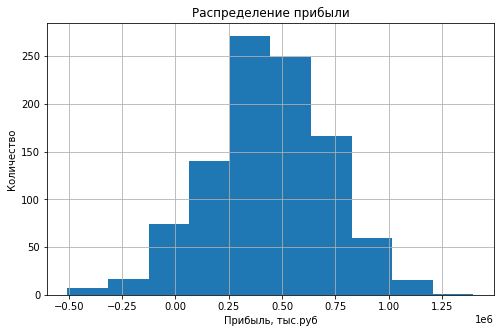

Средняя прибыль: 435.93 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -116.23 млн.руб до: 966.50 млн.руб
95%-ый доверительный интервал: от 418.76 млн.руб до 453.11 млн.руб
Процент вероятности убытка в данном регионе составит 6.1%


In [157]:
bootstap_1000(target_valid_0,predict_0)


Для второго региона: 

  0%|          | 0/1000 [00:00<?, ?it/s]

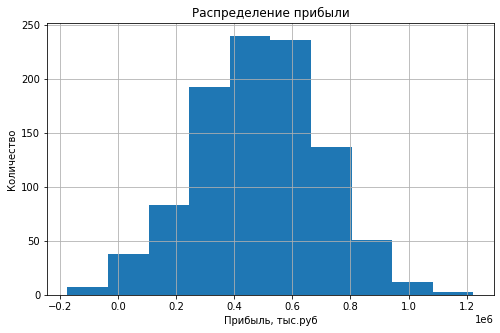

Средняя прибыль: 489.66 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 55.12 млн.руб до: 905.76 млн.руб
95%-ый доверительный интервал: от 476.23 млн.руб до 503.09 млн.руб
Процент вероятности убытка в данном регионе составит 1.1%


In [158]:
bootstap_1000(target_valid_1,predict_1) 

Для третьего региона: 

  0%|          | 0/1000 [00:00<?, ?it/s]

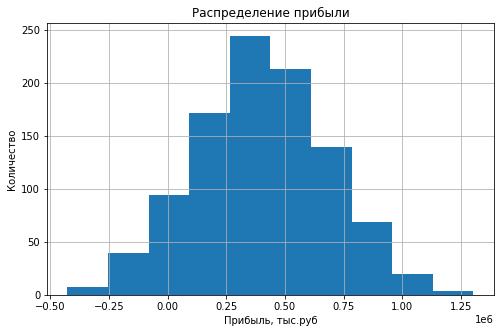

Средняя прибыль: 403.69 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -153.12 млн.руб до: 952.89 млн.руб
95%-ый доверительный интервал: от 386.21 млн.руб до 421.17 млн.руб
Процент вероятности убытка в данном регионе составит 7.1%


In [159]:
bootstap_1000(target_valid_2,predict_2) 

По итогам рассчетов самым прибыльным оказался 2 регион - 489.66 млн.руб 
При этом вероятность убытков в этом регионе составит всего 1.1 провент против 6.1 и 7.1 в двух других 
По условию задачи нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%, соответственно 1 и 3 регионы выбывают. 
Таким образом не смотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во втором регионе прогнозируется выше других. 

### Общий вывод 

Мы получили и исследовали данные по запасам в скважинах трёх регионов. 
После загрузки данных была проведена проверка на выбросы и дубликаты, которых обнаружено не было. 
Далее мы провели рассчеты и обнаружили, что средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку и для того, чтобы иметь уверенность в перспективе разработки по регионам. Затем обучили модель и выполнили предсказания при помощи линейной регрессии.
Выбрали по 200 лучших скважин каждого региона и применили технологию bootstrap с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок. 
По итогу был выбран 2 регион как перспективный, он показал следующие значения: 
 - Средняя прибыль: 489.66 млн.руб
 - С вероятностью 95% прибыль в данном регионе будет составлять от: 55.12 млн.руб до: 905.76 млн.руб
 - 95%-ый доверительный интервал: от 476.23 млн.руб до 503.09 млн.руб
 - Процент вероятности убытка в данном регионе составит 1.1%
